In [4]:
BP<-read.csv('../data/bodyPerformance.csv', header=T, fileEncoding='utf-8')
str(BP)

'data.frame':	13393 obs. of  12 variables:
 $ 나이                   : int  27 25 31 32 28 36 42 33 54 28 ...
 $ 성별                   : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 1 2 2 2 ...
 $ 키_cm                  : num  172 165 180 174 174 ...
 $ 몸무게_kg              : num  75.2 55.8 78 71.1 67.7 ...
 $ 체지방율               : num  21.3 15.7 20.1 18.4 17.1 22 32.2 36.9 27.6 14.4 ...
 $ 이완기혈압_min         : num  80 77 92 76 70 64 72 84 85 81 ...
 $ 수축기혈압_분          : num  130 126 152 147 127 119 135 137 165 156 ...
 $ 악력                   : num  54.9 36.4 44.8 41.4 43.5 23.8 22.7 45.9 40.4 57.9 ...
 $ 앉아서앞으로구부리기_cm: num  18.4 16.3 12 15.2 27.1 21 0.8 12.3 18.6 12.1 ...
 $ 윗몸일으키기           : num  60 53 49 53 45 27 18 42 34 55 ...
 $ 멀리뛰기               : num  217 229 181 219 217 153 146 234 148 213 ...
 $ 등급                   : Factor w/ 4 levels "A","B","C","D": 3 1 3 2 2 2 4 2 3 2 ...


In [5]:
colnames(BP)

[1] "나이"                    "성별"                   
 [3] "키_cm"                   "몸무게_kg"              
 [5] "체지방율"                "이완기혈압_min"         
 [7] "수축기혈압_분"           "악력"                   
 [9] "앉아서앞으로구부리기_cm" "윗몸일으키기"           
[11] "멀리뛰기"                "등급"

In [6]:
colnames(BP) <- c('나이','성별','키','몸무게','체지방률','이완기혈압','수축기혈압','악력','앞으로굽히기','윗몸일으키기','멀리뛰기','등급')

In [11]:
subset(BP, 키<130)

,나이,성별,키,몸무게,체지방률,이완기혈압,수축기혈압,악력,앞으로굽히기,윗몸일으키기,멀리뛰기,등급
8252,56,F,125,34.4,39.2,69,125,12.6,17,27,109,B


In [49]:
summary(BP$몸무게)
75.30 + (75.30-58.20)*3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.30   58.20   67.40   67.45   75.30  138.10 

[1] 126.6

In [10]:
summary(BP$앞으로굽히기)
subset(BP, 앞으로굽히기>50.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -25.00   10.90   16.20   15.21   20.70  213.00 

,나이,성별,키,몸무게,체지방률,이완기혈압,수축기혈압,악력,앞으로굽히기,윗몸일으키기,멀리뛰기,등급
2658,33,M,165.6,60.4,17.8,81,127,38.6,213,53,244,B
3356,45,M,164.4,64.4,24.3,96,142,38.5,185,44,223,A


In [8]:
### 앞으로굽히기 극단이상치 기준
# 3분위값 + IQR*3 초과이면 극이상치
20.70+(20.70-10.90)*3
# 1분위값 - IQR*3 미만이면 극이상치
10.90-(20.70-10.90)*3

[1] 50.1

[1] -18.5

# 극이상치 3분위값으로 넣기
BP$앞으로굽히기 <- ifelse(BP$앞으로굽히기 > 50.1, 20.70, BP$앞으로굽히기)
# 극이상치 1분위값으로 넣기
BP$앞으로굽히기 <- ifelse(BP$앞으로굽히기 < -18.5, 10.90, BP$앞으로굽히기)

In [9]:
summary(BP$체지방률)
subset(BP, 체지방률>58)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   18.00   22.80   23.24   28.00   78.40 

,나이,성별,키,몸무게,체지방률,이완기혈압,수축기혈압,악력,앞으로굽히기,윗몸일으키기,멀리뛰기,등급
736,21,M,177.6,74.5,78.4,69,122,44.9,26.1,59,235,A


In [10]:
### 체지방률 극단이상치 기준
# 3분위값 + IQR*3
28.00+(28.00-18.00)*3
# 1분위값 - IQR*3
18.00-(28.00-18.00)*3

[1] 58

[1] -12

# 극이상치 3분위값으로 넣기
BP$체지방률 <- ifelse(BP$체지방률 > 58, 28, BP$체지방률)
# 극이상치 1분위값으로 넣기
BP$체지방률 <- ifelse(BP$체지방률 < -12, 18, BP$체지방률)

In [13]:
summary(BP$bmi)

Length  Class   Mode 
     0   NULL   NULL 

In [14]:
# 극단이상치 
21.60 - (25.30-21.60)*3
25.30 + (25.30-21.60)*3

[1] 10.5

[1] 36.4

BP$bmi <- ifelse(BP$bmi < 10.5, 21.60, BP$bmi)
BP$bmi <- ifelse(BP$bmi > 36.4, 25.30, BP$bmi)
boxplot(BP$bmi)

In [18]:
BP[c(736,2658,3356),]

,나이,성별,키,몸무게,체지방률,이완기혈압,수축기혈압,악력,앞으로굽히기,윗몸일으키기,멀리뛰기,등급
736,21,M,177.6,74.5,78.4,69,122,44.9,26.1,59,235,A
2658,33,M,165.6,60.4,17.8,81,127,38.6,213.0,53,244,B
3356,45,M,164.4,64.4,24.3,96,142,38.5,185.0,44,223,A


In [19]:
BP1 <- BP[-c(736,2658,3356),]
rownames(BP1) <- c()
summary(BP1)
str(BP1)

      나이       성별           키            몸무게          체지방률    
 Min.   :21.00   F:4926   Min.   :125.0   Min.   : 26.30   Min.   : 3.00  
 1st Qu.:25.00   M:8464   1st Qu.:162.4   1st Qu.: 58.20   1st Qu.:18.00  
 Median :32.00            Median :169.2   Median : 67.40   Median :22.80  
 Mean   :36.78            Mean   :168.6   Mean   : 67.45   Mean   :23.24  
 3rd Qu.:48.00            3rd Qu.:174.8   3rd Qu.: 75.30   3rd Qu.:28.00  
 Max.   :64.00            Max.   :193.8   Max.   :138.10   Max.   :54.90  
   이완기혈압      수축기혈압         악력        앞으로굽히기   
 Min.   :  0.0   Min.   :  0.0   Min.   : 0.00   Min.   :-25.00  
 1st Qu.: 71.0   1st Qu.:120.0   1st Qu.:27.50   1st Qu.: 10.90  
 Median : 79.0   Median :130.0   Median :37.90   Median : 16.20  
 Mean   : 78.8   Mean   :130.2   Mean   :36.96   Mean   : 15.18  
 3rd Qu.: 86.0   3rd Qu.:141.0   3rd Qu.:45.20   3rd Qu.: 20.70  
 Max.   :156.2   Max.   :201.0   Max.   :70.50   Max.   : 42.00  
  윗몸일으키기      멀리뛰기     등급    
 Min.   : 0.0

'data.frame':	13390 obs. of  12 variables:
 $ 나이        : int  27 25 31 32 28 36 42 33 54 28 ...
 $ 성별        : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 1 2 2 2 ...
 $ 키          : num  172 165 180 174 174 ...
 $ 몸무게      : num  75.2 55.8 78 71.1 67.7 ...
 $ 체지방률    : num  21.3 15.7 20.1 18.4 17.1 22 32.2 36.9 27.6 14.4 ...
 $ 이완기혈압  : num  80 77 92 76 70 64 72 84 85 81 ...
 $ 수축기혈압  : num  130 126 152 147 127 119 135 137 165 156 ...
 $ 악력        : num  54.9 36.4 44.8 41.4 43.5 23.8 22.7 45.9 40.4 57.9 ...
 $ 앞으로굽히기: num  18.4 16.3 12 15.2 27.1 21 0.8 12.3 18.6 12.1 ...
 $ 윗몸일으키기: num  60 53 49 53 45 27 18 42 34 55 ...
 $ 멀리뛰기    : num  217 229 181 219 217 153 146 234 148 213 ...
 $ 등급        : Factor w/ 4 levels "A","B","C","D": 3 1 3 2 2 2 4 2 3 2 ...


In [21]:
table(BP1$등급)


   A    B    C    D 
3346 3346 3349 3349 

In [2]:
library(nnet)
library(party)
library(randomForest)
library(e1071)
library(caret)
library(dplyr)
library(plotrix)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, 

In [7]:
# Sampling
samp <- createDataPartition(BP$등급, p=0.7, list=F)
# 학습용
data.train <- BP[samp,]
nrow(data.train)

# 검증용
data.test <- BP[-samp,]

# 문제 및 정답 만들기
x <- subset(data.train, select=-등급)
y <- data.train$등급

[1] 9377

In [13]:
# 인공신경망
nnetF <- function(q){
  result = 0
  for(i in 1:q){
    # 학습하기
    nnet <- nnet(등급~.,data=data.train, size=2)

    # 검증하기
    pred <- predict(nnet, x, type='class') # type class로 0과 1 예측하기

    # 예측율  
    mean(pred == y)
    table(pred,y)
    # 예측율  
    result = (result + mean(pred == y))
  }
  return(result/q)
}

# 의사결정나무
ctreeF <- function(q){
  result = 0
  for(i in 1:q){
  # 학습하기
  ctree <- ctree(등급~.,data=data.train)

  # 검증하기
  pred <- predict(ctree, x) # 이하, type class 안해도 0과 1로 예측

  # 예측율
  result <- (result + mean(pred == y))
  }
  return(result/q)
}

# Random Forest
rfF <- function(q){  
  result = 0
  for(i in 1:q){
  # 학습하기
  rf <- randomForest(등급~.,data=data.train, ntree=100)

  # 검증하기
  pred <- predict(rf, x)

  # 예측율  
  result <- (result + mean(pred == y))
  }
  return(result/q)
}

# SVM
svmF <- function(q){  
  result = 0
  for(i in 1:q){
  # 학습하기
  svm = svm(등급~.,data=data.train)

  # 검증하기
  pred <- predict(svm, x)

  # 예측율
  result <- (result + mean(pred == y))
  }
  return(result/q)
}

# 다항 로지스틱 회귀분석
mulF <- function(q){  
  result = 0
  for(i in 1:q){
  # 학습하기
  mul <- multinom(등급~.,data=data.train)

  # 검증하기
  pred <- predict(mul, x)

  # 예측율  
  result <- (result + mean(pred == y))
  }
  return(result/q)
}


In [14]:
final <- function(q){
  result <- data.frame(예측력=c(nnetF(q),ctreeF(q),rfF(q),svmF(q),mulF(q)))
  rownames(result) <- c('인공신경망','의사결정나무','RandomForest','SVM','로지스틱회귀분석')
  return(result)
}

In [15]:
final(5)

# weights:  36
initial  value 13946.936022 
iter  10 value 12983.352466
iter  20 value 12443.610304
iter  30 value 10377.416196
iter  40 value 10132.745058
iter  50 value 10091.139550
iter  60 value 10078.082712
iter  70 value 10035.773330
iter  80 value 10011.296697
iter  90 value 10008.700110
iter 100 value 9865.184989
final  value 9865.184989 
stopped after 100 iterations
# weights:  36
initial  value 14461.563613 
iter  10 value 12106.056900
iter  20 value 10567.846344
iter  30 value 10102.903672
iter  40 value 9997.370106
iter  50 value 9742.584458
iter  60 value 9598.945457
iter  70 value 9144.983868
iter  80 value 8369.794975
iter  90 value 8025.084125
iter 100 value 7969.195036
final  value 7969.195036 
stopped after 100 iterations
# weights:  36
initial  value 13590.689924 
iter  10 value 13011.168680
iter  20 value 12378.321108
iter  30 value 11145.410474
iter  40 value 10625.527379
iter  50 value 10061.289990
iter  60 value 9861.398177
iter  70 value 9691.835619
iter  80 val

,예측력
인공신경망,0.5375920
의사결정나무,0.7371227
RandomForest,1.0000000
SVM,0.7124880
로지스틱회귀분석,0.6174683


In [20]:
summary(BP$앞으로굽히기)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -18.40   10.90   16.20   15.23   20.70   42.00 

In [21]:
BP$유연성 <- ifelse(BP$앞으로굽히기 < 10.90, 1, 
    ifelse(BP$앞으로굽히기 < 16.20, 2, 
      ifelse(BP$앞으로굽히기 < 20.70, 3, 4
      )
    )
  )

In [22]:
(table(BP$유연성,BP$등급))

   
       A    B    C    D
  1    0  253 1039 2024
  2  391 1175 1096  678
  3 1129 1116  700  394
  4 1828  803  514  253

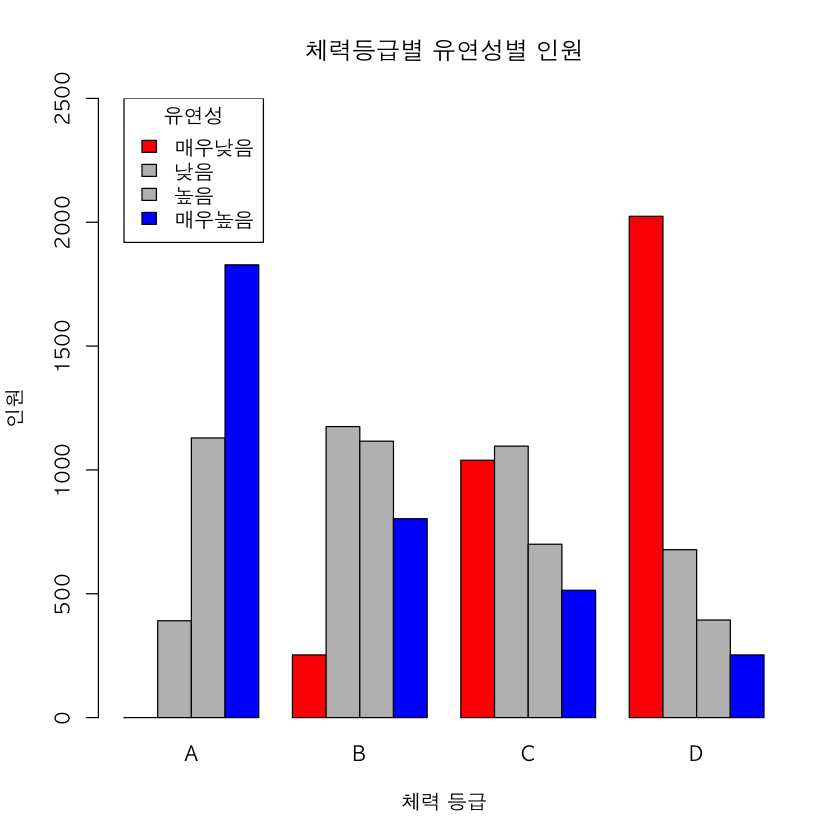

In [23]:
options(warn=-1)
par(family="AppleGothic")
barplot(table((BP$유연성),BP$등급),
  beside=T,
  main='체력등급별 유연성별 인원',
  ylim=c(0,2500),
  ylab='인원',
  xlab='체력 등급',
  col=c('red','grey','grey','blue'),
)
legend(1,2500,
      title='유연성',
      c("매우낮음","낮음","높음","매우높음"),
      fill=c('red','grey','grey','blue')
      )

In [24]:
summary(BP$윗몸일으키기)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   30.00   41.00   39.77   50.00   80.00 

In [25]:
BP$복근력 <- ifelse(BP$윗몸일으키기 < 30, 1, 
    ifelse(BP$윗몸일으키기 < 41, 2, 
      ifelse(BP$윗몸일으키기 < 50, 3, 4
      )
    )
  )

In [26]:
table(BP$복근력,BP$등급)

   
       A    B    C    D
  1  163  500  836 1563
  2  696  856  877  917
  3  870  931  912  537
  4 1619 1060  724  332

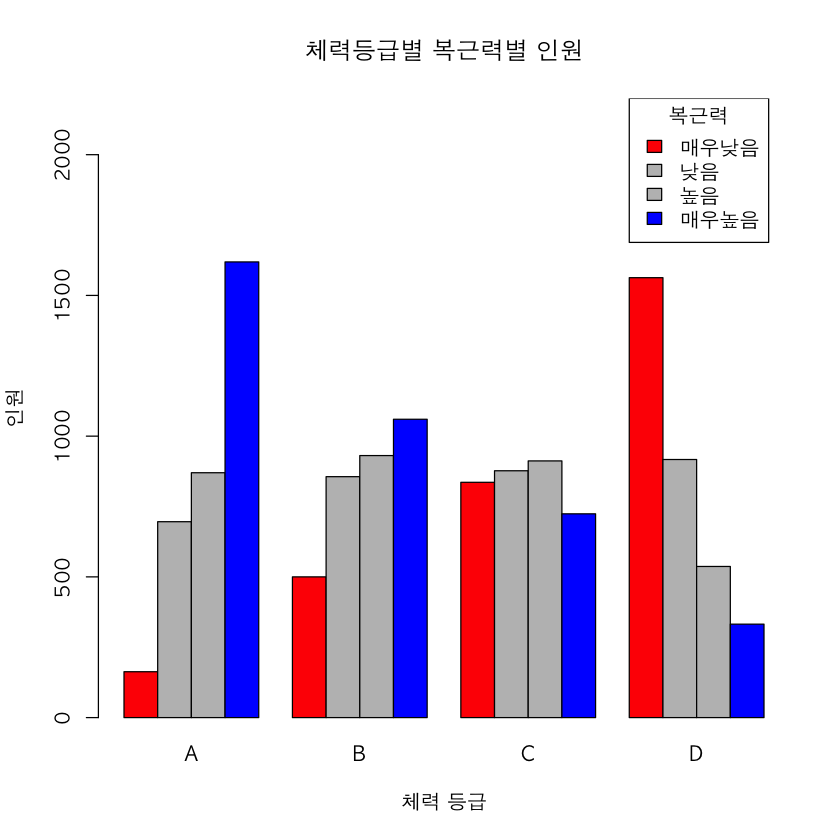

In [27]:
par(family="AppleGothic")
barplot(table(BP$복근력,BP$등급),
  beside=T,
  main='체력등급별 복근력별 인원',
  ylim=c(0,2200),
  ylab='인원',
  xlab='체력 등급',
  col=c('red','grey','grey','blue'),
)
legend(16,2200,
      title='복근력',
      c("매우낮음","낮음","높음","매우높음"),
      fill=c('red','grey','grey','blue'),
      )

In [28]:
table(BP$성별, BP$등급)

   
       A    B    C    D
  F 1484 1185 1112 1145
  M 1864 2162 2237 2204

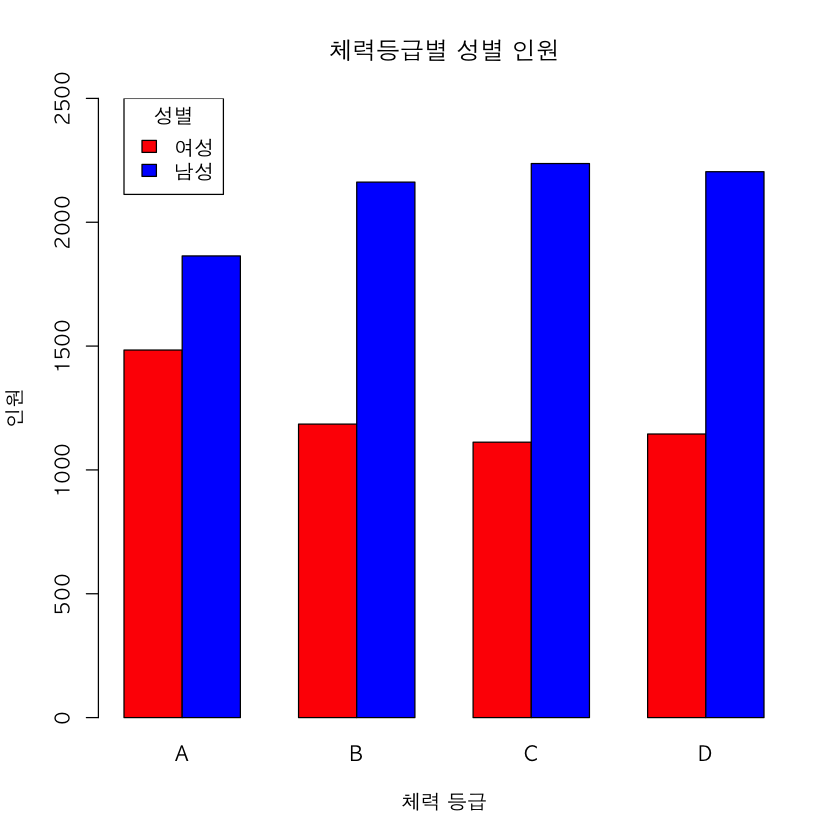

In [29]:
par(family="AppleGothic")
barplot(table(BP$성별,BP$등급),
  beside=T,
  main='체력등급별 성별 인원',
  ylim=c(0,2500),
  ylab='인원',
  xlab='체력 등급',
  col=c('red','blue'),
)
legend(1,2500,
      title='성별',
      c("여성","남성"),
      fill=c('red','blue'),
      )

In [30]:
BP$bmi <- round(BP$몸무게 / (BP$키 * BP$키 / 10000),1)
summary(BP$bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.10   21.60   23.50   23.61   25.30   42.90 

In [31]:
head(BP)[,-c(3,4,6,7,13,14)]

나이,성별,체지방률,악력,앞으로굽히기,윗몸일으키기,멀리뛰기,등급,bmi
27,M,21.3,54.9,18.4,60,217,C,25.3
25,M,15.7,36.4,16.3,53,229,A,20.5
31,M,20.1,44.8,12.0,49,181,C,24.2
32,M,18.4,41.4,15.2,53,219,B,23.3
28,M,17.1,43.5,27.1,45,217,B,22.4
36,F,22.0,23.8,21.0,27,153,B,20.3


In [32]:
BP[,c('등급','윗몸일으키기')]

등급,윗몸일으키기
C,60
A,53
C,49
B,53
B,45
B,27
D,18
B,42
C,34
B,55


In [33]:
BP <- BP[-736,]
rownames(BP) <- c()

In [34]:
head(BP)


나이,성별,키,몸무게,체지방률,이완기혈압,수축기혈압,악력,앞으로굽히기,윗몸일으키기,멀리뛰기,등급,유연성,복근력,bmi
27,M,172.3,75.24,21.3,80,130,54.9,18.4,60,217,C,3,4,25.3
25,M,165.0,55.80,15.7,77,126,36.4,16.3,53,229,A,3,4,20.5
31,M,179.6,78.00,20.1,92,152,44.8,12.0,49,181,C,2,3,24.2
32,M,174.5,71.10,18.4,76,147,41.4,15.2,53,219,B,2,4,23.3
28,M,173.8,67.70,17.1,70,127,43.5,27.1,45,217,B,4,3,22.4
36,F,165.4,55.40,22.0,64,119,23.8,21.0,27,153,B,4,1,20.3


In [35]:
write.csv(BP, '../data/BP_sw.csv',row.names=F)